# Descriptive Stats

In [1]:
# Daten laden
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descriptive_stats as ds
df_a = ds.load_airports()
df_f = ds.load_flights()

## Überblick der Daten

In [2]:
df_a.head()

,ident,type,name,municipality,latitude,longitude,region,takeoffs,landings,total,count_destinations
0,00AK,small_airport,Lowell Field,Anchor Point,59.949200,-151.695999,unkown,41,66,107,13
1,00AL,small_airport,Epps Airpark,Harvest,34.864799,-86.770302,unkown,4,14,18,3
2,00AS,small_airport,Fulton Airport,Alex,34.942803,-97.818019,unkown,20,20,40,14
3,00AZ,small_airport,Cordes Airport,Cordes,34.305599,-112.165001,unkown,81,148,229,13
4,00CL,small_airport,Williams Ag Airport,Biggs,39.427188,-121.763427,unkown,55,106,161,30


In [3]:
df_f.head()

,callsign,origin,destination,day,distance
0,CCA583,KLAX,EDDF,2021-05-01,9344.153346
1,VCV3770,LYBE,UUWW,2021-05-01,1694.492080
2,UTN4490,UKBB,UKBB,2021-05-01,0.000000
3,CCA627,ZGSZ,EDDF,2021-05-01,9133.793170
4,CES553,RJBB,LFPG,2021-05-01,9648.489241


## Deskritive Statistik

### Lage Flugbewegungen
Im folgenden Abschnitt behandeln wir die Lage der Flugbewegungen vom Monat Mai und September sowie zusammen. 

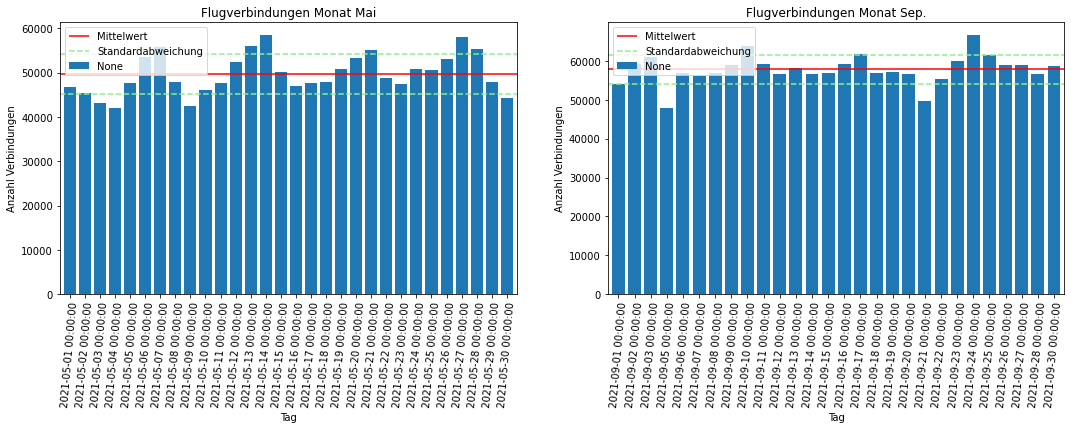

In [4]:
bar = ds.show_stats(df_f)

Die Visualisierung zeigt die Anzahl Verbindungen vom Monat Mai und September. Es ist zu erkennen, dass jeweils gegen Freitags im Monat Mai sowie September ein höhere Anzahl Flugverbindungen aufweist. Nachfolgend die Kennzahlen der Lagebeurteilung:

In [5]:
print(ds.flight_infos(df_f))

Total FLugverbindungen: 3113109
Median:			55347.0
Mittelwert:		53674.29
Standardabweichung:	5770.71

FLugverbindungen im Mai: 1493562
Mittelwert:		49785.4
Median:			48416.0
Standardabweichung:	4526.67

FLugverbindungen im Sep: 1619547
Mittelwert:		57840.96
Median:			57633.0
Standardabweichung:	3672.27


Die Lage der beiden Flugbewegungen sind ungefähr gleich. Im September ist das Flugaufkommen jedoch nochmals höher als im Mai sowie konstanter.

Uns intressiert dabei, die Verteilung dieser Flugbewegungen in Anbetracht eines Flughafens. Wir untersuchen rund 14'000 Flughäfen - im folgenden Plot sind die Flughäfen nach Anzahl Verbindungen absteigend sortiert aufgezeigt:

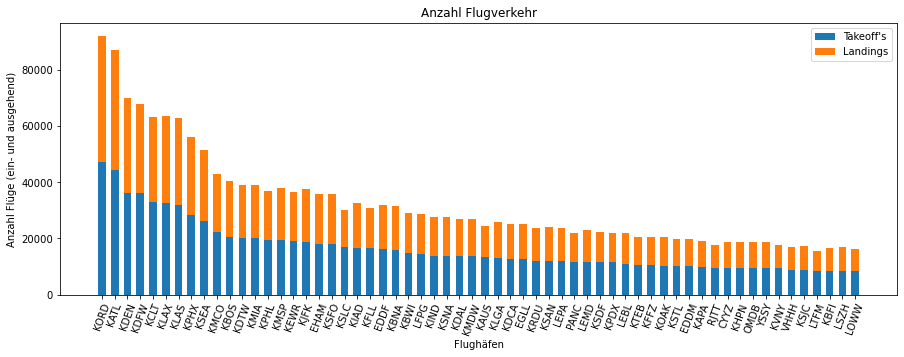

In [6]:
fig = ds.show_distribution(df_a)

KORD und KATL sind die grössten internationale Flughäfen der Stadt Chicago und Atlanta welche im Vergleich zu anderen Flughäfen doppelt soviele Flugbewegungen wie der Durchschnitt aufweisen. Infolgedessen intressiert uns die Verteilung nach Region welche für die USA gross ausfallen dürfte.

[Text(0.5, 1.0, 'Flugverkehr nach Region'),
 Text(0.5, 0, 'Anzahl Flugverbindungen'),
 Text(0, 0.5, 'Regionen')]

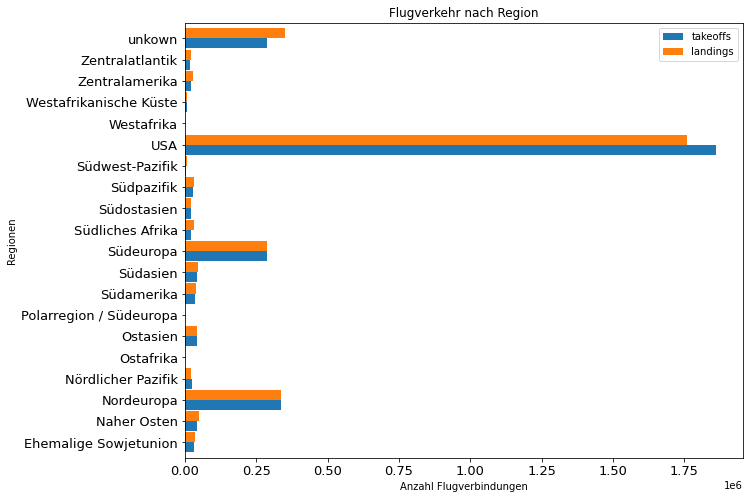

In [7]:
ds.show_distribution_region(df_a)

### Lage zur Anzahl Destinationen
Im folgenden Abschnitt gehen wir auf die Variablen Distanz einer Flugbewegung.

In [8]:
print(ds.stats_destinations(df_a))

Anzahl Flughafen:13819
Mittelwert: 29.36
Median:	9.0
Varianz:	5333.56
Standardabweichung: 73.03


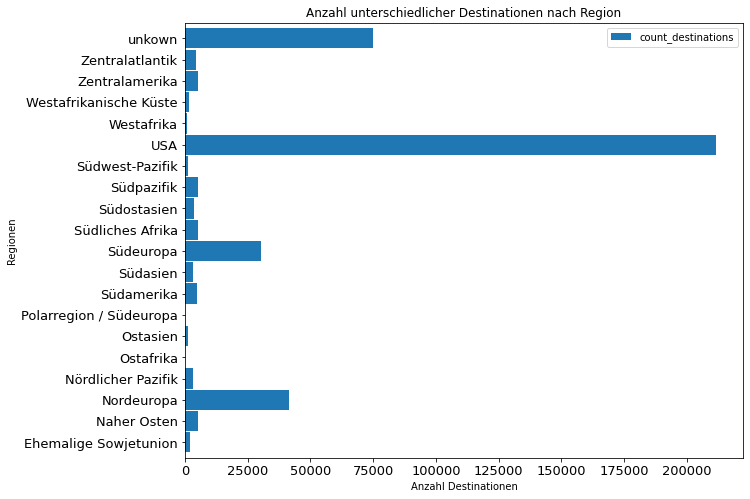

In [9]:
fig = ds.show_stats_destinations(df_a)

Ein ähnliches Resultat wie zuvor bei den Flugbewegungen ist entstanden. Die Anzahl Destinationen in den Regionen USA und Europa sind grösser als in anderen Regionen. Dies zeigt erneut auf, dass wir Flughafen in ihrer Region unterscheiden bei der Analyse der Verkehrknoten.

### Streuung Flugbewegung
In diesem Abschnitt untersuchen wir das Streuungsmass der Daten, um die Breite der Variablen zu bestimmen. Als Mass dient die Varianz und die Standardabweichung.

In [10]:
print("September:" + ds.get_stats(df_f.loc[df_f['day'] > '2021-06-01'],'day')) #September
print("\nMai: "+ ds.get_stats(df_f.loc[df_f['day'] < '2021-06-01'],'day')) #Mai

September:
Mittelwert: 57840.96
Varianz:	13485555.67
Standardabweichung: 3672.27
Max:66556
Min:47891

Mai: 
Mittelwert: 49785.4
Varianz:	20490783.83
Standardabweichung: 4526.67
Max:58424
Min:42001


### Form Flugbewegung
In Anbetracht der Lage sowie Median- und Mittelwert, können wir eine asymmetrische Verteilung erkennen, da Mittelwert und Median nicht gleich sind. Die Form dieser Verteilung zu untersuchen, gibt Aufschluss darüber, an welchem Tag bzw. Tagen am meisten los war. In folgender kumulativen Verteilungsfunktion ist keine asymetrie zu erkennen. Die vorhin genannten grösseren Anstiege an Freitagen ist nicht sichtbar. 

<AxesSubplot:title={'center':'Verteilung Mai'}, xlabel='Datum', ylabel='Kumulative Verteilung'>

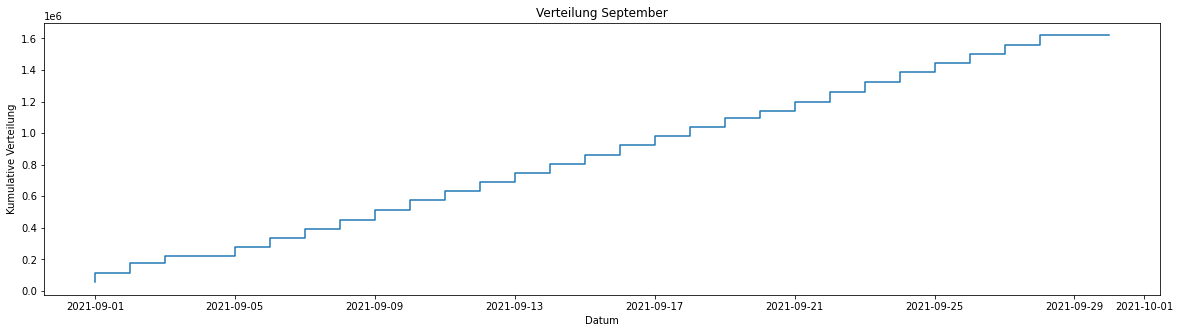

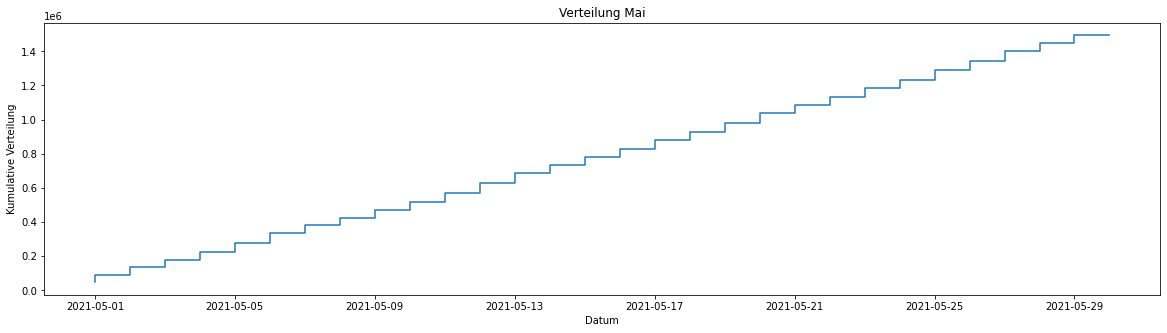

In [11]:
ds.show_cum_flights(df_f.loc[df_f['day'] > '2021-06-01'], "Verteilung September")
ds.show_cum_flights(df_f.loc[df_f['day'] < '2021-06-01'], "Verteilung Mai")